In [1]:
import lightgbm
lightgbm.__version__

'4.1.0'

# Python API

In [7]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X.shape, y.shape

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 핵심코드
train_data = lgb.Dataset(X_train, label = y_train)
test_data = lgb.Dataset(X_test, label = y_test)

#type(train_data)

params = {
    'objective': 'multiclass',
    'num_class': 3,  # Number of classes in the dataset
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# 모델 클래스
# clf = Deci()
# clf.fit(X_train, y_train)

# 모델 학습
num_round = 5  # 경사하강법, Learning_rate
model = lgb.train(params, train_data, num_round, valid_sets = [test_data])
model

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [9]:
# 예측
y_pred = model.predict(X_test)
y_pred_max = [list(x).index(max(x)) for x in y_pred]
# 모델 평가
accuracy = accuracy_score(y_test, y_pred_max)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


## Python Scikit-Learn API

In [12]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
# X.shape, y.shape

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 모델 학습
lgb_clf = lgb.LGBMClassifier(objective='multiclass',
                             num_class=3,  # Number of classes in the dataset
                             num_leaves=31,
                             learning_rate=0.05,
                             feature_fraction=0.9,
                             bagging_fraction=0.8,
                             bagging_freq=5)

lgb_clf.fit(X_train, y_train)

y_pred = lgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] 

1.0

In [13]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 매개변수 설정
params = {
    'objective': 'multi:softmax',  # 다중 클래스 분류 문제
    'num_class': 3,  # 클래스의 개수
    'max_depth': 3,  # 트리의 최대 깊이
    'eta': 0.1,  # 학습률
    'eval_metric': 'mlogloss',  # 평가 지표
    'seed': 42  # 랜덤 시드
}

# 모델 학습
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 100  # 부스팅 라운드 수
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10)

# 예측
y_pred = bst.predict(dtest)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-mlogloss:0.96390	train-mlogloss:0.97226
[1]	eval-mlogloss:0.85092	train-mlogloss:0.86617
[2]	eval-mlogloss:0.75482	train-mlogloss:0.77586
[3]	eval-mlogloss:0.67222	train-mlogloss:0.69817
[4]	eval-mlogloss:0.60110	train-mlogloss:0.63080
[5]	eval-mlogloss:0.53860	train-mlogloss:0.57201
[6]	eval-mlogloss:0.48355	train-mlogloss:0.51969
[7]	eval-mlogloss:0.43566	train-mlogloss:0.47422
[8]	eval-mlogloss:0.39311	train-mlogloss:0.43330
[9]	eval-mlogloss:0.35538	train-mlogloss:0.39693
[10]	eval-mlogloss:0.32183	train-mlogloss:0.36452
[11]	eval-mlogloss:0.29191	train-mlogloss:0.33556
[12]	eval-mlogloss:0.26527	train-mlogloss:0.30954
[13]	eval-mlogloss:0.24119	train-mlogloss:0.28625
[14]	eval-mlogloss:0.21982	train-mlogloss:0.26522
[15]	eval-mlogloss:0.20196	train-mlogloss:0.24619
[16]	eval-mlogloss:0.18430	train-mlogloss:0.22911
[17]	eval-mlogloss:0.17050	train-mlogloss:0.21368
[18]	eval-mlogloss:0.15643	train-mlogloss:0.19907
[19]	eval-mlogloss:0.14388	train-mlogloss:0.18617
[20]	eval-

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

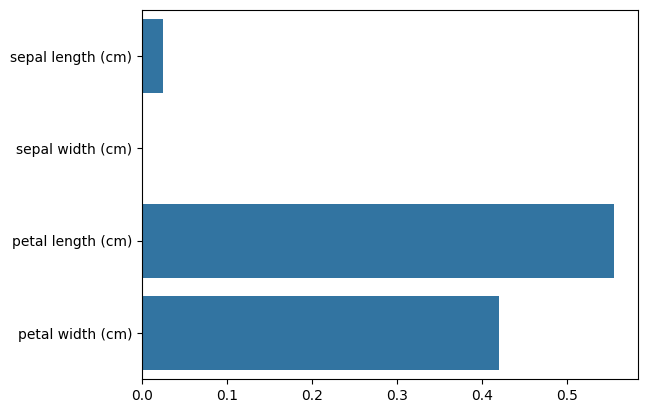

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

In [15]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3388, 561), (2947, 561), (7352, 1), (2947, 1))

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 14.5 MB


In [18]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

## RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9253478113335596